This notebook focuses on the recombination maps published in "High-Resolution Estimates of Crossover and Noncrossover Recombination from a Captive Baboon Colony".
Note: chrX is not available from the supplementary.

In [1]:
%run ../scripts/notebook_settings_lean.py

In [2]:
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep=" ")
meta_data_samples.Origin.unique()

array(['Mikumi, Tanzania', 'Aberdare, Kenya', 'Chunga, Zambia', 'captive',
       'Awash, Ethiopia', 'Serengeti, Tanzania', 'Arusha, Tanzania',
       'Ngorongoro, Tanzania', 'Ruaha, Tanzania', 'Gombe, Tanzania',
       'Udzungwa, Tanzania', 'Mahale, Tanzania', 'Katavi, Tanzania',
       'Selous, Tanzania', 'Lake Manyara, Tanzania',
       'Tarangire, Tanzania', 'Niokolo-Koba, Senegal',
       'Issa Valley, Tanzania', 'Dendro Park, Zambia', 'Filoha, Ethiopia',
       'Gog Woreda, Gambella region, Ethiopia'], dtype=object)

In [3]:
recomb_path = "../data/baboon_pyrho_chr1-20.rmap.bed.gz"

In [4]:
recomb_df = pd.read_csv(recomb_path, compression = "gzip", sep = "\t", names = ["chrom", "start", "end", "recomb"])
recomb_df

,chrom,start,end,recomb
0,1,486,725,2.772670e-07
1,1,725,863,2.772670e-07
2,1,863,887,2.772670e-07
3,1,887,1466,2.772670e-07
4,1,1466,1720,2.772670e-07
...,...,...,...,...
10349971,20,50004637,50004699,4.482500e-09
10349972,20,50004699,50004795,4.482500e-09
10349973,20,50004795,50004806,4.482500e-09
10349974,20,50004806,50005618,4.482500e-09


In [5]:
total_size = 0
for chrom in recomb_df.chrom.unique():
    chrom_df = recomb_df.loc[recomb_df.chrom == chrom]
    chrom_df["window_size"] = chrom_df.end - chrom_df.start
    chrom_df["genetic_distance"] = chrom_df.window_size*chrom_df.recomb
    print(chrom, chrom_df.window_size.sum(), chrom_df.genetic_distance.sum()*100)
    total_size += chrom_df.genetic_distance.sum()*100
print(total_size)

/tmp/53564649/ipykernel_2846670/3375749826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chrom_df["window_size"] = chrom_df.end - chrom_df.start
/tmp/53564649/ipykernel_2846670/3375749826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chrom_df["genetic_distance"] = chrom_df.window_size*chrom_df.recomb
/tmp/53564649/ipykernel_2846670/3375749826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



1 218172295 168.01756710680476
2 193660178 150.128291349576
3 184898009 143.58349267307528
4 182119945 146.36398480998122
5 173897266 133.7826992935472
6 167134153 135.75379615614966
7 161758939 131.0533996519945
8 140274754 126.09326273421766
9 127591383 111.79967091998569
10 126450781 111.09603959787391
11 125912768 111.73859425352867
12 123321249 103.74756426318619
13 106847686 103.8056407899683
14 106653613 106.97713322831169
15 91982665 98.10651529574712
16 91183038 102.24850477796083
17 74523917 84.54713869110287
18 72893420 81.64055844077754
19 72015959 75.09493537851765
20 50005642 67.93956831386623
2293.518357726173


/tmp/53564649/ipykernel_2846670/3375749826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chrom_df["window_size"] = chrom_df.end - chrom_df.start
/tmp/53564649/ipykernel_2846670/3375749826.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chrom_df["genetic_distance"] = chrom_df.window_size*chrom_df.recomb
/tmp/53564649/ipykernel_2846670/3375749826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Smart pandas trick:
Create a range of intervals: np.arange(0, chrom_df.start.max(), 1000000)
Cut them: pd.cut
Groupby so you can calculate a summary statistic for all cuts (which now are windows).

/tmp/53564649/ipykernel_2846670/909280824.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


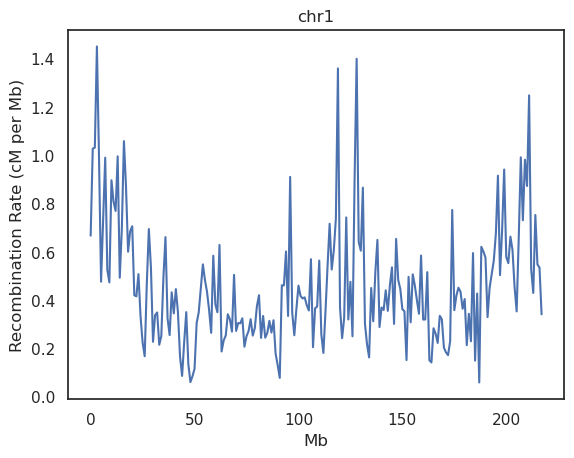

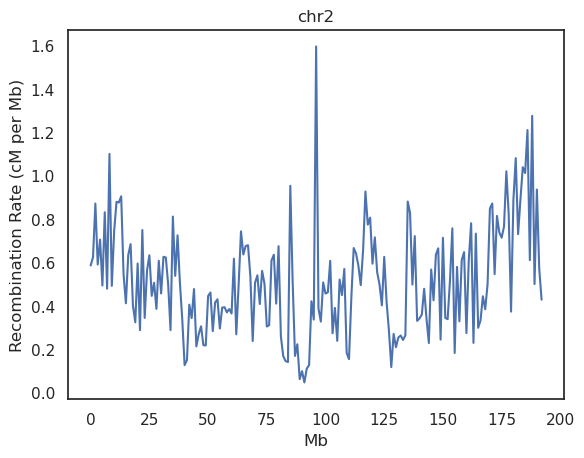

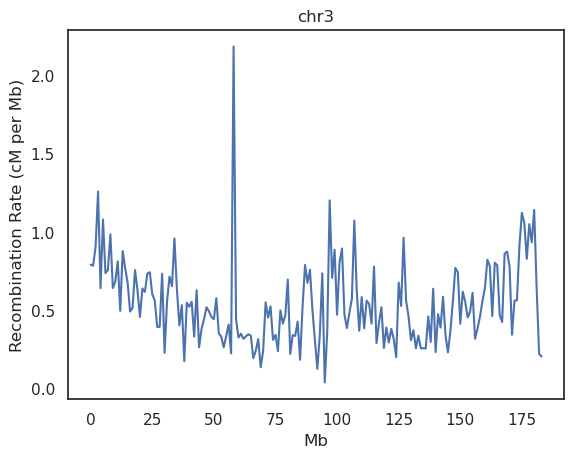

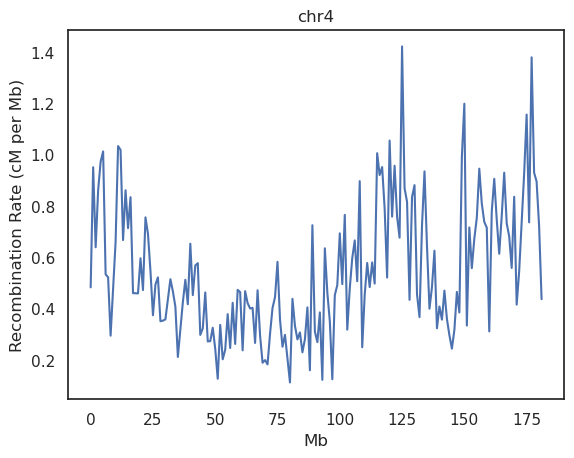

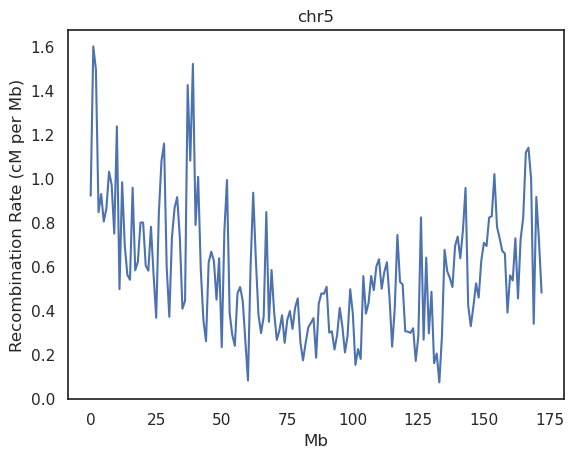

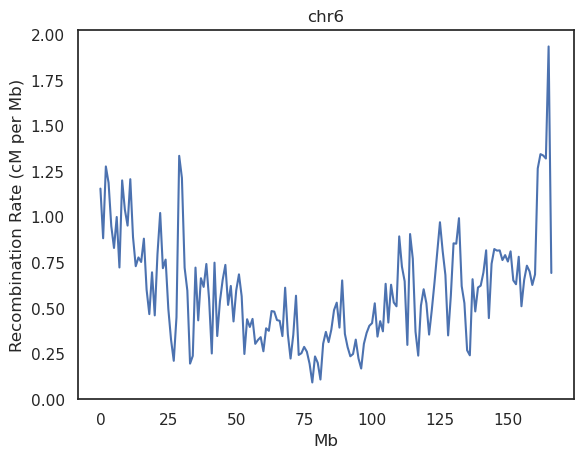

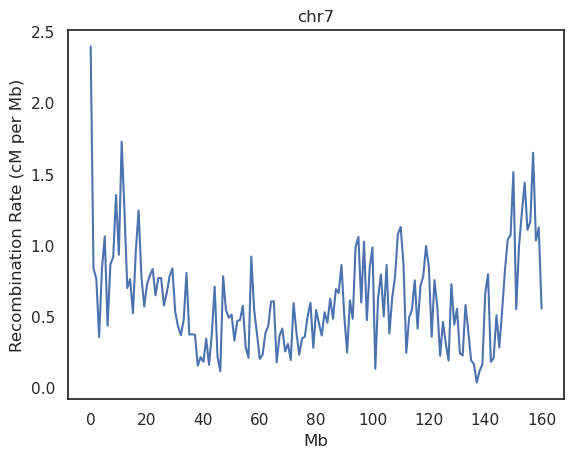

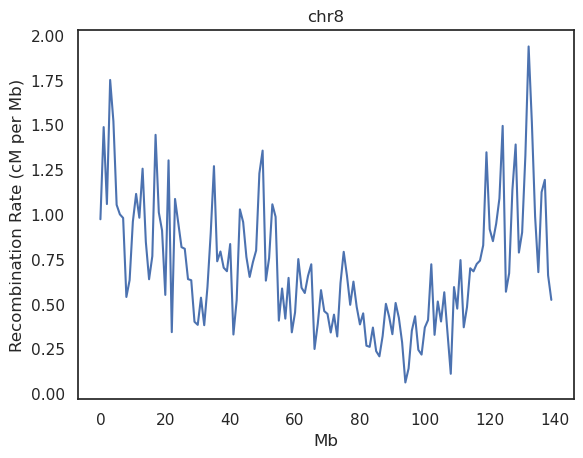

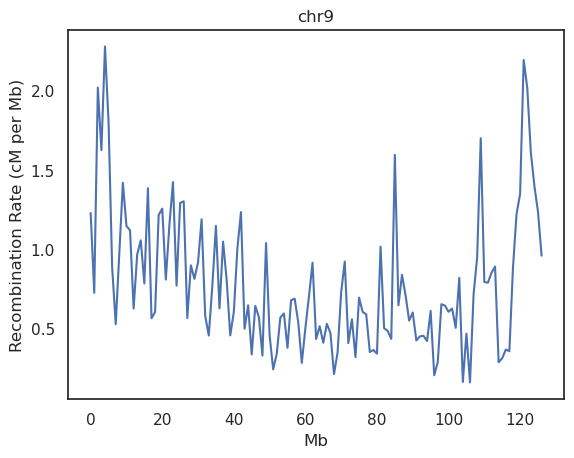

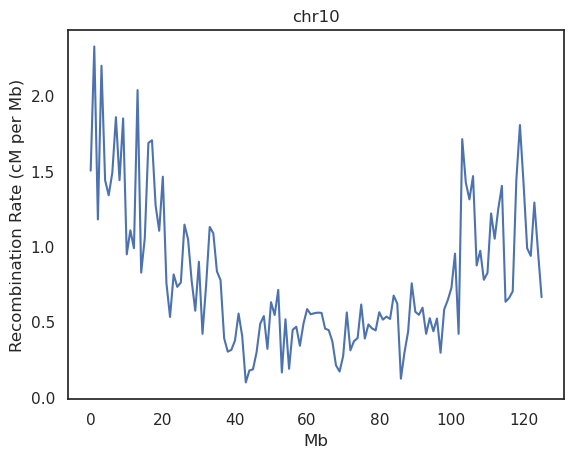

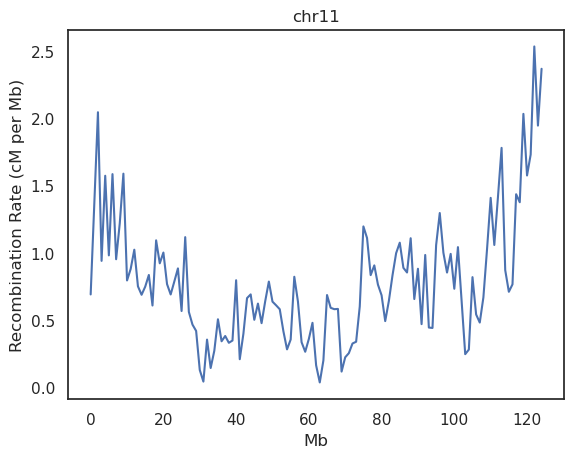

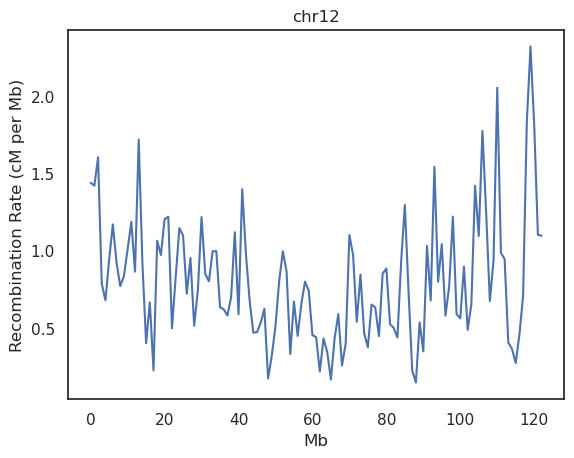

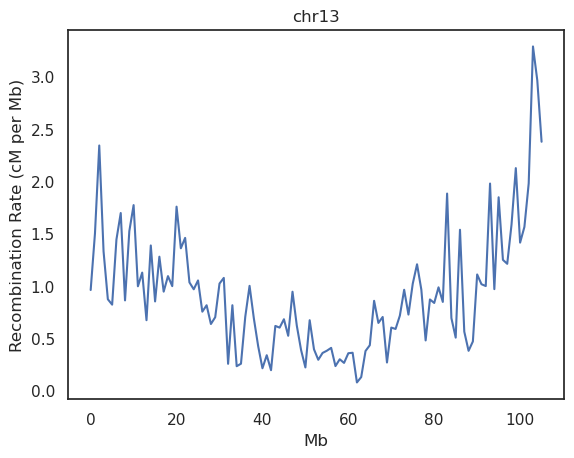

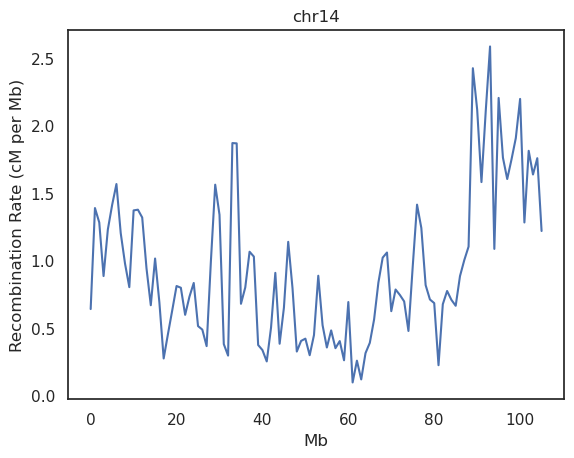

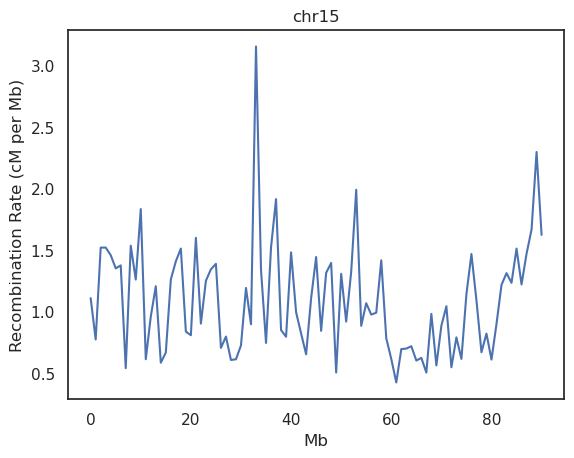

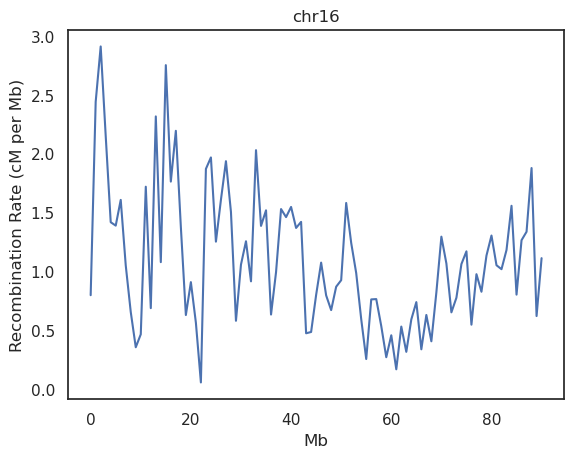

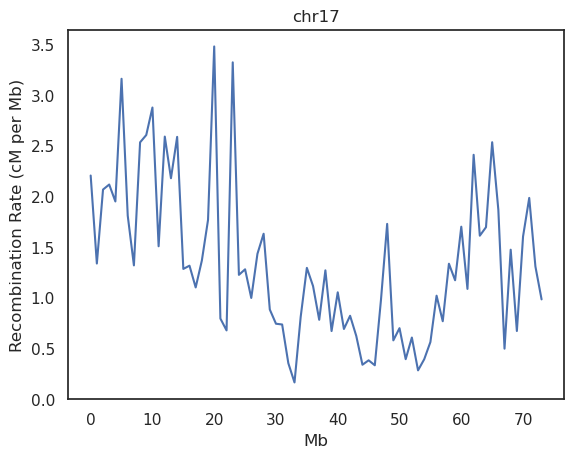

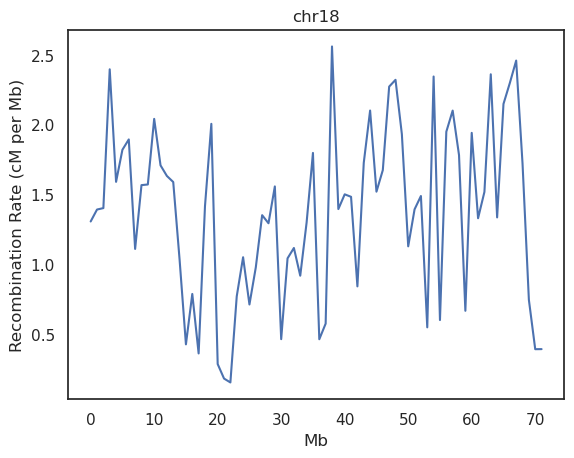

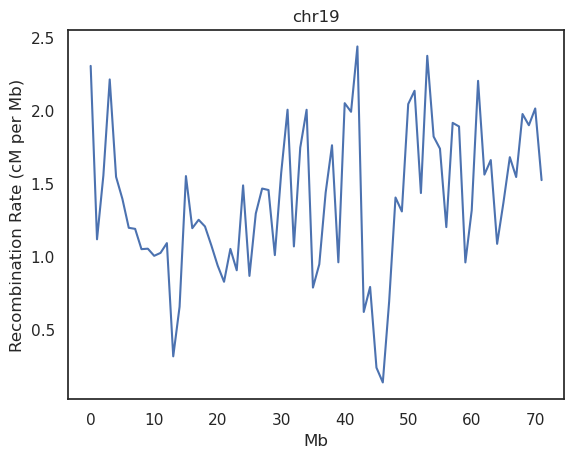

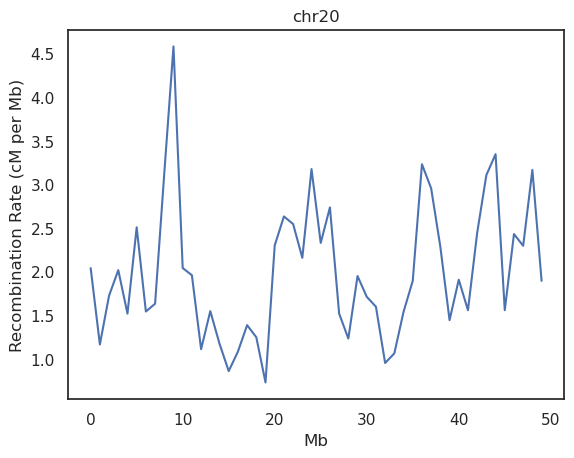

<Figure size 640x480 with 0 Axes>

In [8]:
window_size = 1000000
for chrom in recomb_df.chrom.unique():
    chrom_df = recomb_df.loc[recomb_df.chrom == chrom].reset_index()
    chrom_df["window_size"] = chrom_df.end - chrom_df.start
    chrom_df["genetic_distance"] = chrom_df.window_size*chrom_df.recomb
    total_size = chrom_df.genetic_distance.sum()
    window_sums = chrom_df.groupby(pd.cut(chrom_df.start,np.arange\
                                          (0, chrom_df.start.max(), window_size))).sum().genetic_distance*100/total_size
    fig = sns.lineplot(y = window_sums,
                x = list(range(len(window_sums))))
    fig.set(title = "chr{}".format(chrom), ylabel="Recombination Rate (cM per Mb)", xlabel="Mb")
    plt.figure()

<AxesSubplot:xlabel='start', ylabel='genetic_distance'>

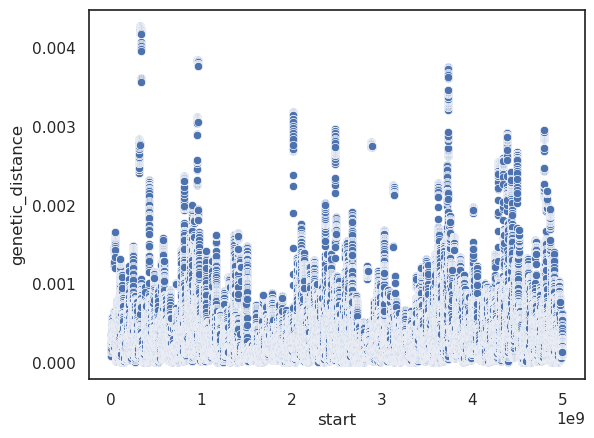

In [7]:
sns.scatterplot(data = chrom_df.rolling(100).sum(), x="start", y="genetic_distance")

Checking chrom sizes in my map.

In [8]:
recombfile_ldhat = "/home/eriks/baboondiversity/data/PG_panu3_recombination_map/genetic_map_chr{}.txt"

In [9]:
pd.read_csv(recombfile_ldhat.format(20), sep=" ")

,chromosome,position,COMBINED_rate(cM/Mb),Genetic_Map(cM)
0,chr20,19,7.341625,0.000396
1,chr20,73,7.341625,0.000786
2,chr20,126,7.341625,0.000947
3,chr20,148,7.341625,0.000954
4,chr20,149,7.341625,0.001050
...,...,...,...,...
2792460,chr20,72046365,0.099375,84.258820
2792461,chr20,72046419,0.099375,84.258822
2792462,chr20,72046439,0.099375,84.258836
2792463,chr20,72046588,0.099375,84.259012


In [10]:
total_size = 0
ldhat_l = []
for chrom in list(range(1, 21)):
    chrom_df = pd.read_csv(recombfile_ldhat.format(chrom), sep=" ")
    ldhat_l.append(chrom_df)
    print(chrom, chrom_df.position.iloc[-1], chrom_df["Genetic_Map(cM)"].iloc[-1])
    total_size += chrom_df["Genetic_Map(cM)"].iloc[-1]
ldhat_df = pd.concat(ldhat_l)
print(total_size)

1 217458862 184.1120863959288
2 188283571 154.05922389395948
3 181338496 160.07422060481807
4 166074342 167.16145866411682
5 183742160 156.7852466968261
6 175397042 144.8952998028145
7 162898541 148.74200080782038
8 140346570 140.78658805541693
9 125784620 132.91040400675328
10 91329658 106.66150408541952
11 132960390 127.17192042623016
12 128289583 119.86555070331023
13 104990022 108.42068674918232
14 124512263 114.18179114655608
15 108045186 108.14251563413524
16 74961076 97.5328924020463
17 91397701 105.76954506008182
18 72525974 81.81711228779926
19 51387235 85.63579694903378
20 72048358 84.2590123377163
2528.9848567099652


/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


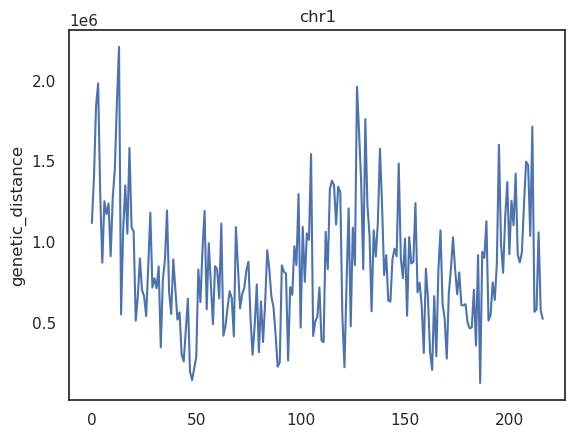

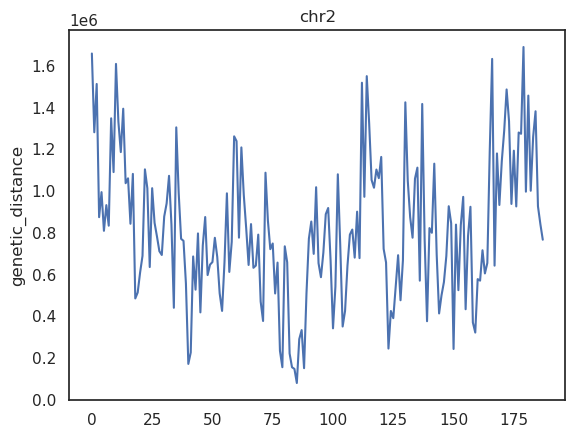

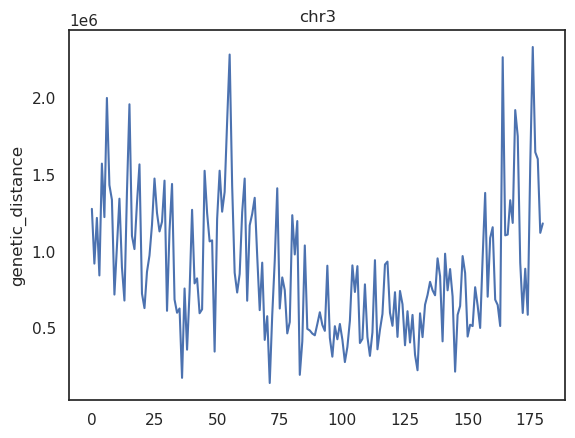

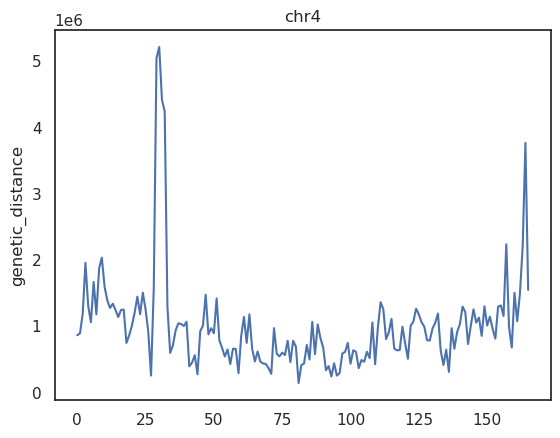

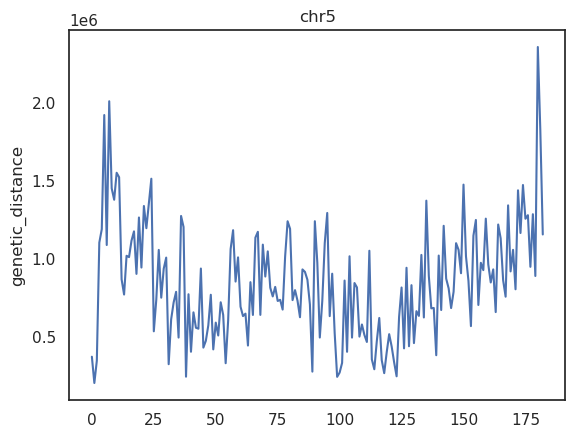

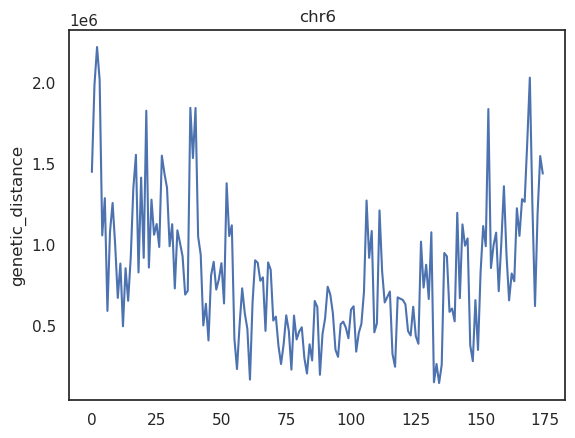

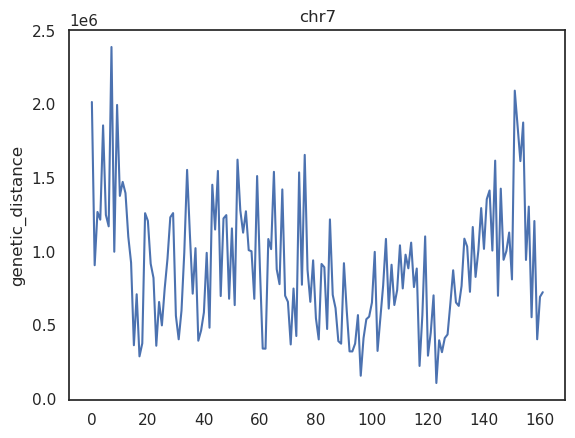

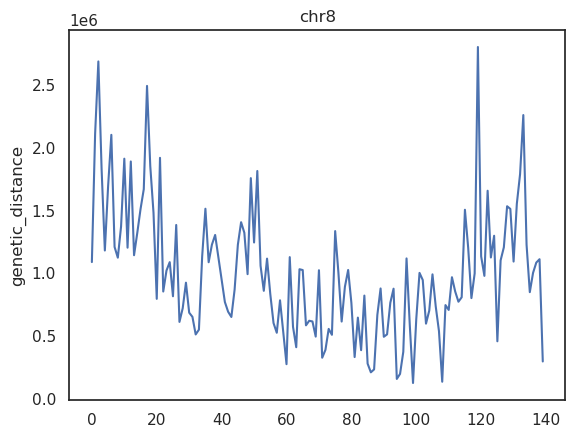

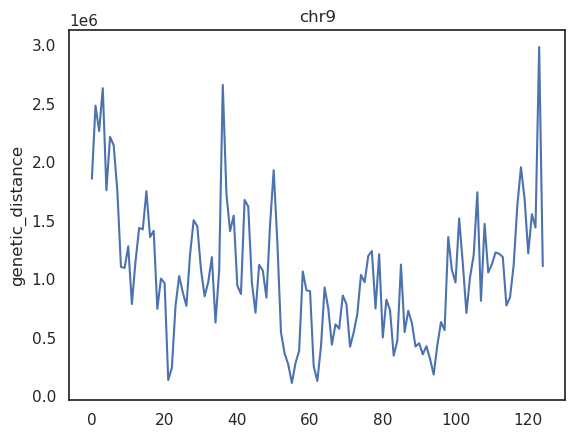

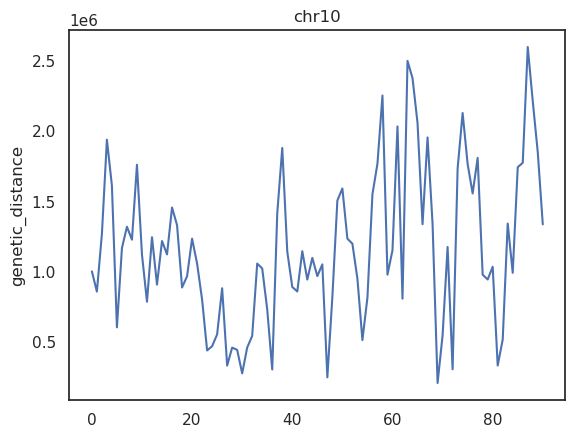

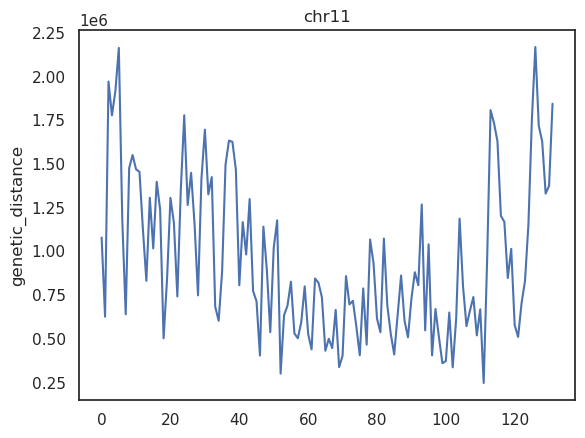

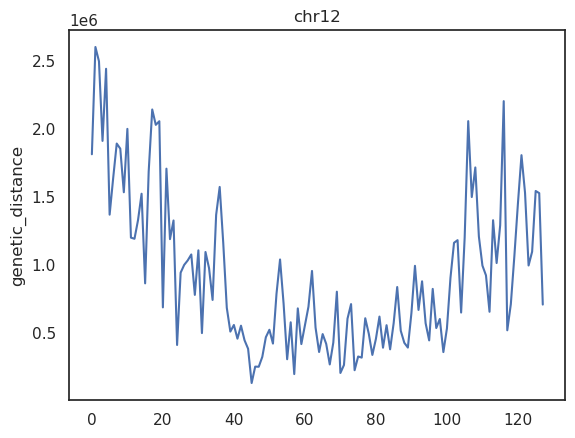

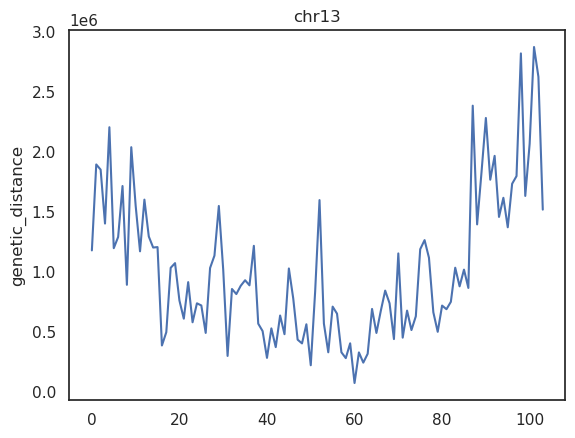

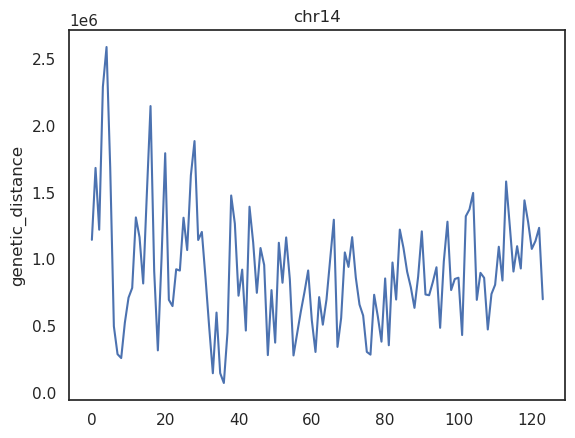

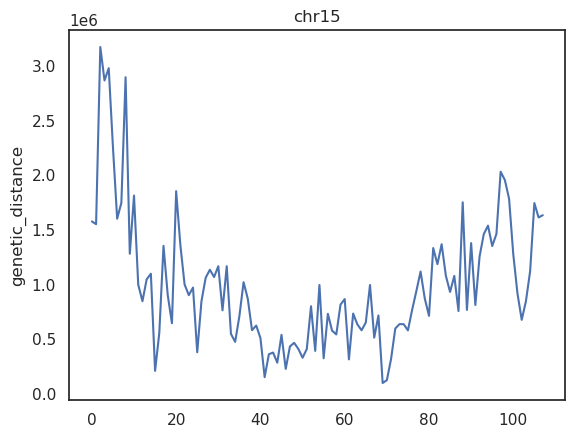

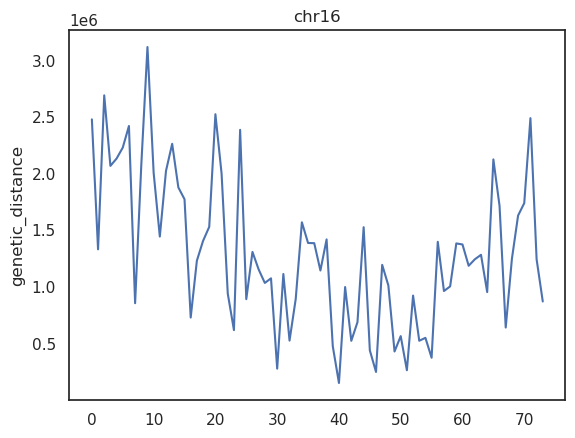

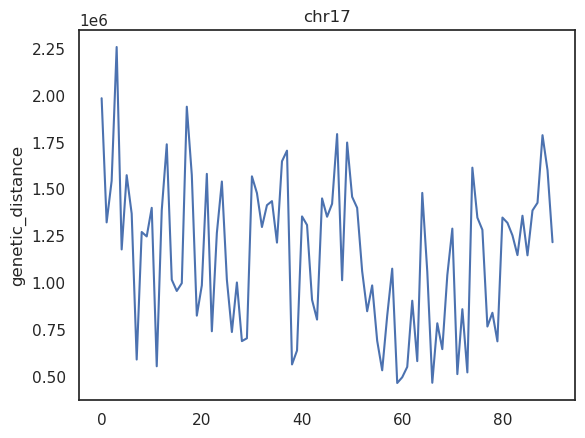

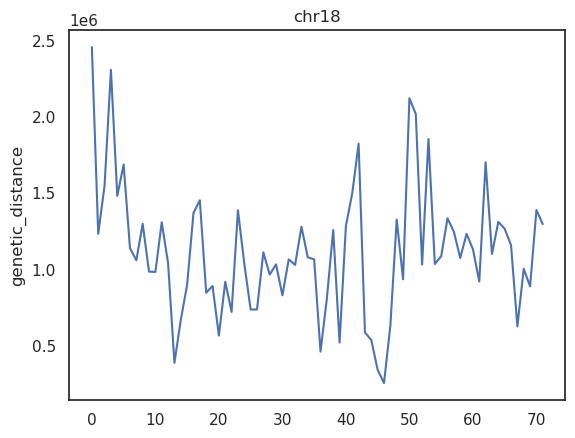

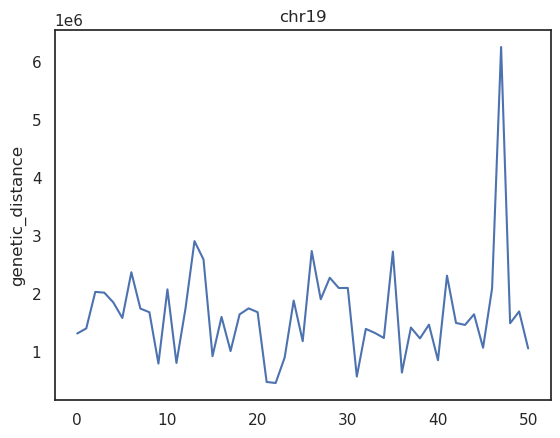

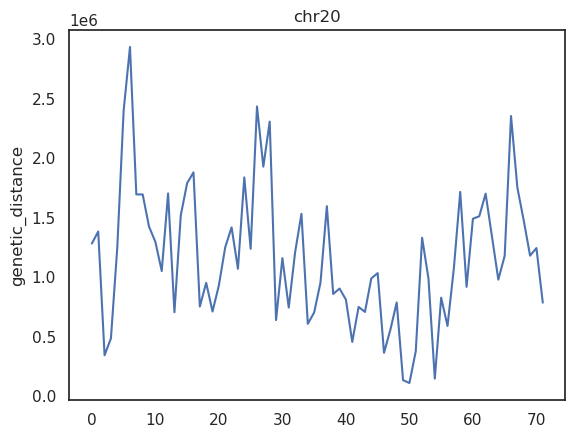

<Figure size 640x480 with 0 Axes>

In [11]:
window_size = 1000000
for chrom in ldhat_df.chromosome.unique():
    chrom_df = ldhat_df.loc[ldhat_df.chromosome == chrom].reset_index()
    chrom_df["window_size"] = -chrom_df.position.diff(periods=-1)
    chrom_df["genetic_distance"] = chrom_df.window_size*(chrom_df["COMBINED_rate(cM/Mb)"])
    window_sums = chrom_df.groupby(pd.cut(chrom_df.position,np.arange\
                                          (0, chrom_df.position.max(), window_size))).sum()["genetic_distance"]
    fig = sns.lineplot(y = window_sums,
                x = list(range(len(window_sums))))
    fig.set(title = "{}".format(chrom))
    plt.figure()